### Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Silky Afina Saly
- **Email:** mc820d5x0376@student.devacademy.id
- **ID Dicoding:** MC820D5X0376

### Menentukan Pertanyaan Bisnis
- Bagaimana pengaruh weekday, working day, dan holiday terhadap jumlah penyewaan sepeda?
- Bagaimana kondisi cuaca (suhu, kelembapan, dan kecepatan angin) mempengaruhi jumlah penyewaan sepeda?

### Import Semua Packages / Library yang digunakan

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import os

### Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight Data Penyewaan Sepeda per Hari:**
- Dataset ini mencerminkan tren harian penyewaan sepeda.
- Kolom weekday: Hari dalam seminggu (0 = Minggu, 6 = Sabtu).
- Kolom workingday: 1 jika hari kerja, 0 jika akhir pekan/hari libur.
- Kolom holiday: 1 jika hari libur, 0 jika bukan.
- Kolom season, holiday, weekday, workingday dapat digunakan untuk melihat pola penyewaan berdasarkan hari kerja atau akhir pekan.
- Kolom weathersit: Kategori kondisi cuaca (1 = cerah, 4 = hujan/salju lebat).
- Kolom temp: Suhu (ternormalisasi, perlu dikonversi ke skala sebenarnya).
- Kolom hum: Kelembapan udara (dalam skala 0-1, perlu dikali 100 untuk persen).
- Kolom windspeed: Kecepatan angin (ternormalisasi, perlu dikonversi ke skala sebenarnya).
- Kolom weathersit, temp, hum, windspeed bisa digunakan untuk melihat pengaruh cuaca.
- Kolom casual: Pengguna tidak terdaftar (pengguna biasa).
- Kolom registered: Pengguna terdaftar.
- Kolom cnt: Total penyewaan sepeda (casual + registered).

In [4]:
hour_df = pd.read_csv("Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight Data Penyewaan Sepeda per Jam:**
- Dataset ini merekam penyewaan sepeda per jam: Ada kolom hr (jam 0-23) yang menunjukkan kapan data diambil.
- Kolom weekday: Hari dalam seminggu (0 = Minggu, 6 = Sabtu).
- Kolom workingday: 1 jika hari kerja, 0 jika akhir pekan/hari libur.
- Kolom holiday: 1 jika hari libur, 0 jika bukan.
- Kolom weathersit: Kategori kondisi cuaca (1 = cerah, 4 = hujan/salju lebat).
- Kolom temp: Suhu (ternormalisasi, perlu dikonversi ke skala sebenarnya).
- Kolom hum: Kelembapan udara (dalam skala 0-1, perlu dikali 100 untuk persen).
- Kolom windspeed: Kecepatan angin (sudah ternormalisasi)
- Kolom casual: Pengguna tidak terdaftar (pengguna biasa).
- Kolom registered: Pengguna terdaftar.
- Kolom cnt: Total penyewaan sepeda (casual + registered).

### Assessing Data

### Tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.duplicated().sum()

np.int64(0)

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

### Tabel `hour_df`

In [ ]:
hour_df.info()

In [ ]:
hour_df.describe()

In [ ]:
hour_df.isnull().sum()

In [ ]:
day_df.duplicated().sum()

In [ ]:
hour_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight Data Penyewaan Sepeda per jam dan per hari:**
- Data sudah siap digunakan untuk analisis karena tidak ada missing value dan duplikat.
- Dataset day dan hour memiliki informasi yang lengkap untuk menjawab pertanyaan analisis.
- Dengan format datetime yang benar, kita bisa melakukan analisis tren waktu lebih mudah (mingguan, bulanan, musiman).
- Dengan data cuaca yang bersih, kita bisa langsung melihat hubungan antara suhu, kelembapan, dan kecepatan angin dengan penyewaan sepeda.

## Exploratory Data Analysis (EDA)

### Tabel `day_df`

In [5]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


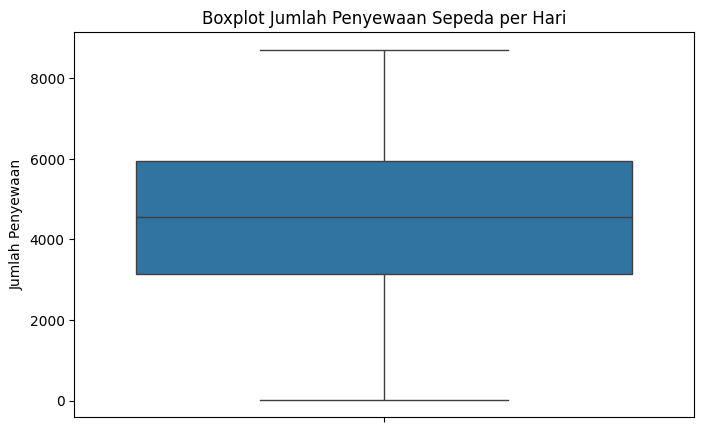

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(y=day_df['cnt'])
plt.title("Boxplot Jumlah Penyewaan Sepeda per Hari")
plt.ylabel("Jumlah Penyewaan")
plt.show()

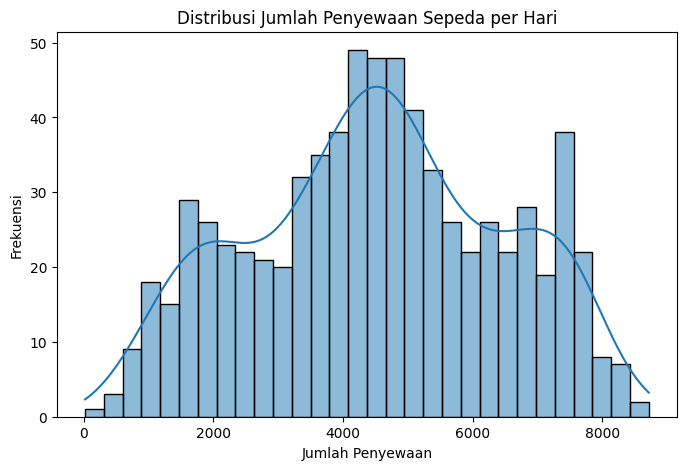

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda per Hari")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

**Insight Data Penyewaan Sepeda per hari:**
- Data penyewaan sepeda cukup terdistribusi normal dengan sedikit skewness ke kanan, yang berarti ada beberapa hari dengan penyewaan sangat tinggi. Namun, distribusi masih cukup simetris, jadi transformasi log tidak terlalu diperlukan.
- Tidak ada indikasi outlier ekstrem yang perlu dihilangkan.
- Distribusi terlihat cukup normal (mendekati distribusi Gaussian) dengan sedikit skewness ke kanan. Ini berarti mayoritas jumlah penyewaan berkisar antara 2000 hingga 6000, dengan puncak sekitar 4000-5000. Ada beberapa nilai ekstrem di sisi kanan (8000+), tapi tidak terlalu jauh dari distribusi utama, sehingga masih wajar.
- Distribusi ini bisa digunakan langsung untuk analisis tanpa perlu transformasi data.

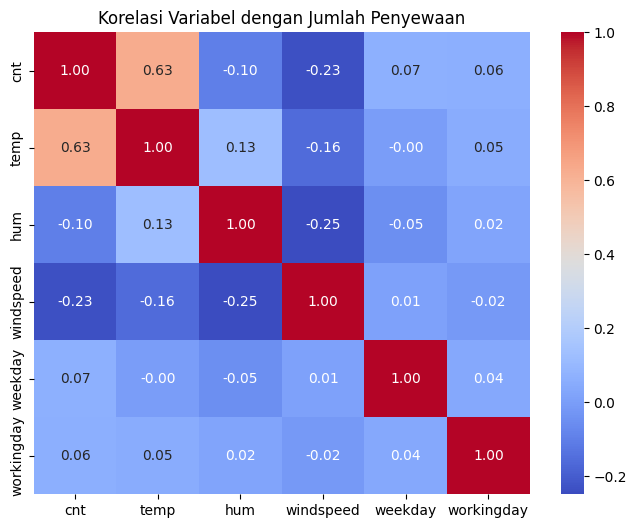

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Variabel dengan Jumlah Penyewaan")
plt.show()

**Insight:**
- Suhu (temp) memiliki korelasi positif yang cukup kuat (0.63), artinya semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Kelembapan (hum) memiliki korelasi negatif lemah (-0.10), artinya semakin tinggi kelembapan, penyewaan cenderung sedikit menurun. Namun, dampaknya kecil karena nilai korelasinya dekat dengan 0.
- Kecepatan angin (windspeed) memiliki korelasi negatif sedang (-0.23), artinya semakin tinggi kecepatan angin, semakin sedikit sepeda yang disewa.
- Hari dalam seminggu (weekday) memiliki korelasi sangat lemah (0.07), menunjukkan bahwa jumlah penyewaan tidak terlalu dipengaruhi oleh hari dalam seminggu.
- Hari kerja (working day) memiliki korelasi sangat lemah (0.06), menunjukkan bahwa jumlah penyewaan tidak jauh berbeda antara hari kerja dan hari libur.

### Tabel `hour_df`

In [8]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


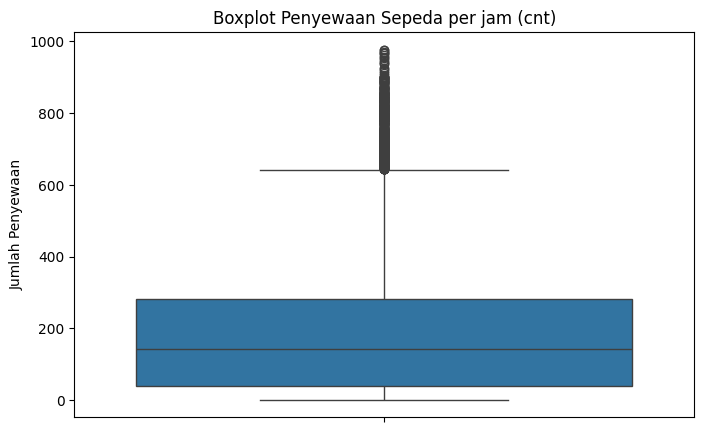

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(y=hour_df['cnt'])
plt.title("Boxplot Penyewaan Sepeda per jam (cnt)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

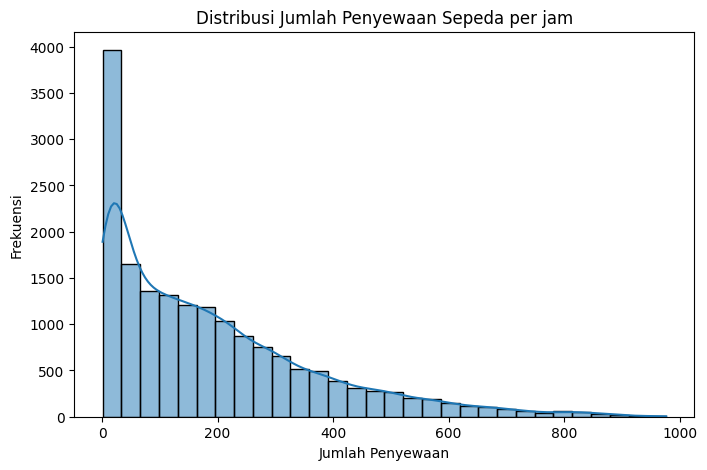

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda per jam")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

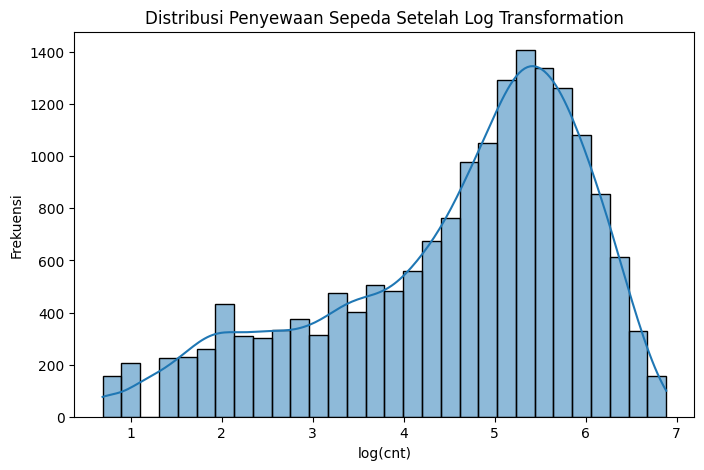

In [11]:
hour_df["cnt_log"] = np.log1p(hour_df["cnt"])
plt.figure(figsize=(8,5))
sns.histplot(hour_df["cnt_log"], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda Setelah Log Transformation")
plt.xlabel("log(cnt)")
plt.ylabel("Frekuensi")
plt.show()

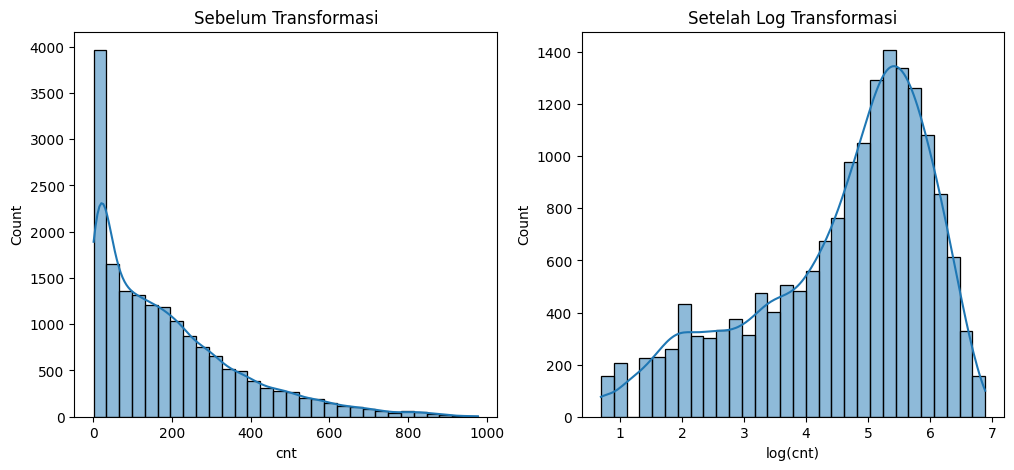

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(hour_df["cnt"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Sebelum Transformasi")
axes[0].set_xlabel("cnt")

sns.histplot(hour_df["cnt_log"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Setelah Log Transformasi")
axes[1].set_xlabel("log(cnt)")

plt.show()


**Insight Data Penyewaan Sepeda per jam:**
- Pada boxplot awal, terlihat bahwa terdapat banyak titik di atas whisker atas, yang berarti ada banyak nilai yang dianggap sebagai outlier. Outlier ini berada di rentang nilai tinggi (di atas sekitar 600 penyewaan per jam).
- Histogram awal menunjukkan distribusi yang sangat right-skewed (positively skewed). Sebagian besar data berada di angka yang rendah (banyak penyewaan di bawah 200), dan semakin besar jumlah penyewaan, semakin jarang kemunculannya.
- Setelah dilakukan transformasi menggunakan log, distribusi data menjadi lebih normal dengan histogram.

In [14]:
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    elif 18 <= hour < 24:
        return 'Malam'
    else:
        return 'Dini Hari'

hour_df['time_of_day'] = hour_df['hr'].apply(categorize_hour)

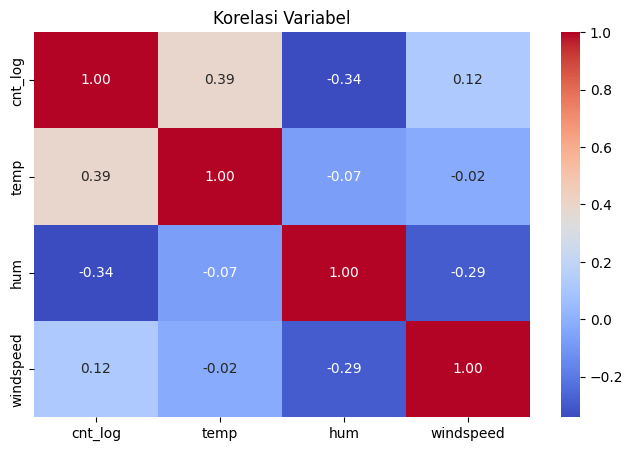

In [15]:
correlation_matrix = hour_df[['cnt_log', 'temp', 'hum', 'windspeed']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Variabel")
plt.show()

**Insight:**
- Suhu (temp) memiliki korelasi positif lemah(0.39) dengan jumlah penyewaan sepeda. Artinya, semakin tinggi suhu, cenderung semakin banyak sepeda yang disewa.
- Kelembapan (hum) memiliki korelasi negatif sedang (-0.34) dengan jumlah penyewaan. Artinya, semakin lembap udara, semakin sedikit sepeda yang disewa. Ini masuk akal karena kondisi lembap mungkin membuat orang kurang nyaman untuk bersepeda.
- Kecepatan angin (windspeed) hampir tidak memiliki hubungan yang kuat dengan jumlah penyewaan sepeda. Mungkin karena angin tidak terlalu berdampak besar pada keputusan orang untuk menyewa sepeda.

## Visualization & Explanatory Analysis

### Bagaimana pengaruh weekday, working day, dan holiday terhadap jumlah penyewaan sepeda?

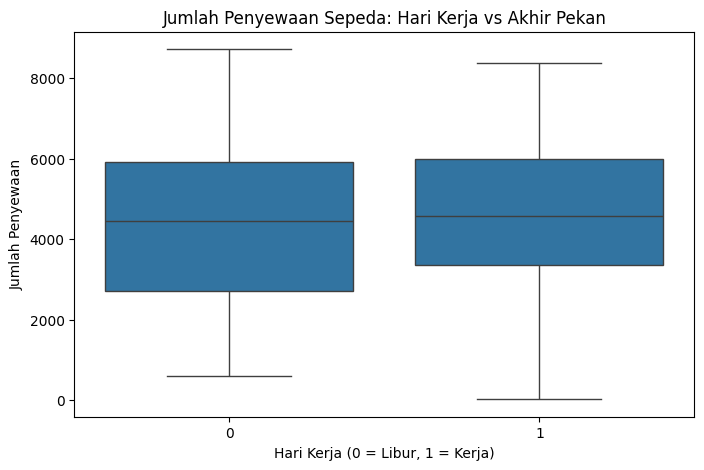

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title("Jumlah Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari Kerja (0 = Libur, 1 = Kerja)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Boxplot hari kerja dibandingkan dengan akhir pekan mennjukkan bahwa jumlah penyewaan pada hari kerja dan akhir pekan tidak berbeda signifikan secara median, tetapi ada variasi yang lebih besar di akhir pekan.
- ini mengindikasikan bahwa orang tetap menyewa sepeda di hari kerja, kemungkinan untuk keperluan transportasi, dan di akhir pekan lebih bervariasi, mungkin untuk rekreasi.

C:\Users\User\AppData\Local\Temp\ipykernel_20324\3217267485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_df, estimator=sum, palette="viridis")


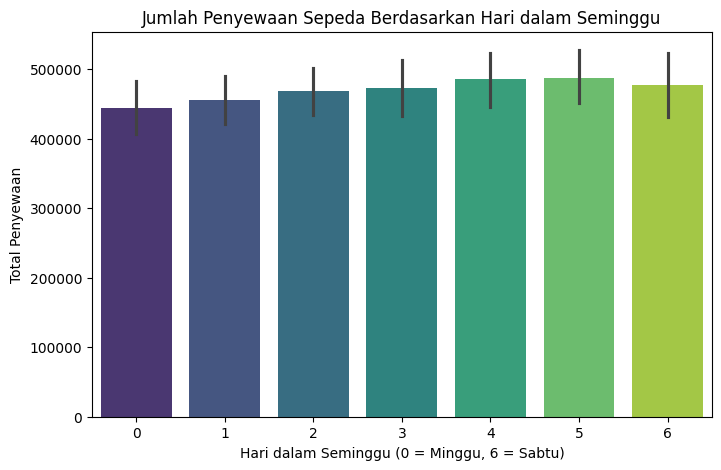

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='weekday', y='cnt', data=day_df, estimator=sum, palette="viridis")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Total Penyewaan")
plt.show()

**Insight:**
- Bar card penyewaan sepeda per hari dalam seminggu cukup stabil, dengan adanya sedikit angka variasi antarhari. Tidak ada perbedaan yang terlalu mencolok antara hari kerja dan akhir pekan, yang berarti penyewaan tidak hanya terjadi karena commuting ke kantor/sekolah tetapi juga untuk aktivitas lainnya.

### Bagaimana kondisi cuaca (suhu, kelembapan, dan kecepatan angin) mempengaruhi jumlah penyewaan sepeda?

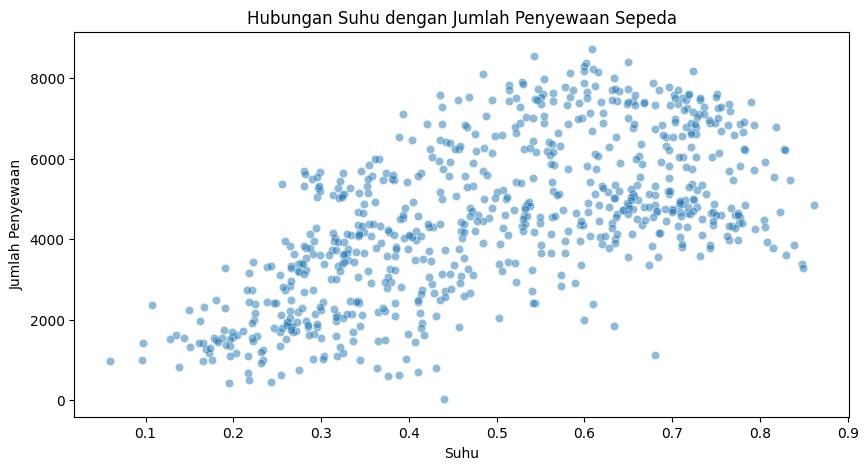

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp', y='cnt', data=day_df, alpha=0.5)
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

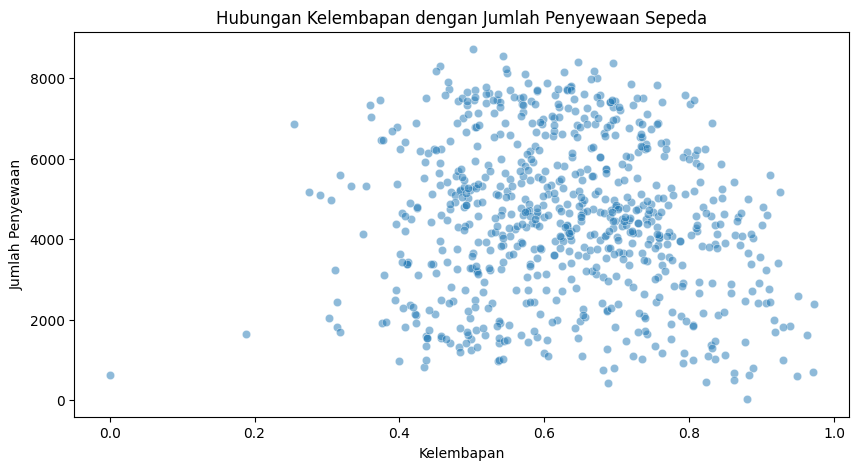

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='hum', y='cnt', data=day_df, alpha=0.5)
plt.title("Hubungan Kelembapan dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Kelembapan")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight Pengaruh Suhu dan Kelembapan terhadap jumlah penyewaan sepeda:**
- Scatter plot pengaruh suhu menghasilkan korelasi positif, dimana semakin tinggi suhu, semakin banyak sepeda yang disewa. Ini bisa disebabkan oleh kenyamanan bersepeda saat suhu sedang hangat.
- Scatter plot kelembapan tidak menghasilkan pola yang jelas antara kelembapan dan penyewaan sepeda. Bisa jadi faktor kelembapan tidak terlalu mempengaruhi keputusan orang untuk menyewa sepeda.
- Suhu berpengaruh cukup besar terhadap jumlah penyewaan, sementara kelembapan tidak menunjukkan hubungan yang kuat.


### RFM Analysis

In [5]:
day_df = pd.read_csv("Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# Konversi kolom dteday ke datetime jika belum
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Pastikan dteday sebagai index untuk resampling
day_df = day_df.set_index("dteday")

# Hitung Recency: Selisih hari dari tanggal terakhir dalam dataset
max_date = day_df.index.max()
day_df["days_since_rental"] = (max_date - day_df.index).days

# Hitung Frequency dan Monetary berdasarkan minggu
df_rfm = day_df.resample('W').agg({
    'cnt': ['sum', 'count']  # Ganti 'count' dengan 'cnt' (nama kolom dari dataset Bike Sharing UCI)
})

# Beri nama ulang kolom
df_rfm.columns = ['Monetary', 'Frequency']
df_rfm = df_rfm.reset_index()

# Recency: Ambil nilai minimum days_since_rental per minggu
df_recency = day_df.resample('W')["days_since_rental"].min().reset_index()
df_recency = df_recency.rename(columns={"days_since_rental": "Recency"})

# Gabungkan semua metrik RFM
df_rfm = df_rfm.merge(df_recency, on="dteday")

# Lihat hasilnya
print(df_rfm.head())


      dteday  Monetary  Frequency  Recency
0 2011-01-02      1786          2      729
1 2011-01-09      9408          7      722
2 2011-01-16      9025          7      715
3 2011-01-23      8770          7      708
4 2011-01-30      7699          7      701


### Klasifikasi RFM Score

Untuk mengelompokkan pelanggan berdasarkan Recency, Frequency, dan Monetary, kita bisa membagi setiap metrik menjadi 3 atau 4 kategori (tergantung kebutuhan).

In [8]:
# Fungsi untuk memberikan skor RFM (1 = Terendah, 3 = Tertinggi)
def rfm_score(x, quantiles):
    if x <= quantiles[0.25]:
        return 1
    elif x <= quantiles[0.50]:
        return 2
    elif x <= quantiles[0.75]:
        return 3
    else:
        return 4

# Hitung kuartil untuk tiap metrik RFM
quantiles = df_rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

# Buat skor RFM berdasarkan kuartil
df_rfm['R_Score'] = df_rfm['Recency'].apply(rfm_score, quantiles=quantiles['Recency'])
df_rfm['F_Score'] = df_rfm['Frequency'].apply(rfm_score, quantiles=quantiles['Frequency'])
df_rfm['M_Score'] = df_rfm['Monetary'].apply(rfm_score, quantiles=quantiles['Monetary'])

# Gabungkan skor RFM menjadi satu nilai
df_rfm['RFM_Score'] = df_rfm['R_Score'].astype(str) + df_rfm['F_Score'].astype(str) + df_rfm['M_Score'].astype(str)

# Lihat hasilnya
print(df_rfm[['dteday', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].head())

      dteday  Recency  Frequency  Monetary RFM_Score
0 2011-01-02      729          2      1786       411
1 2011-01-09      722          7      9408       411
2 2011-01-16      715          7      9025       411
3 2011-01-23      708          7      8770       411
4 2011-01-30      701          7      7699       411


### Klasifikasi Customer berdasarkan RFM Score 

In [9]:
# Kategorisasi berdasarkan RFM Score
def classify_rfm(score):
    if score in ['444', '443']:
        return 'Loyal Customer'
    elif score in ['441', '431']:
        return 'Potential Loyalist'
    elif score in ['411', '311']:
        return 'New Customer'
    elif score in ['144', '133']:
        return 'At Risk'
    else:
        return 'Lost Customer'

df_rfm['Customer_Segment'] = df_rfm['RFM_Score'].apply(classify_rfm)

# Lihat jumlah customer di tiap segmen
print(df_rfm['Customer_Segment'].value_counts())

Customer_Segment
Lost Customer    85
New Customer     21
Name: count, dtype: int64


### Visualisasi RFM Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_9840\3578216264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_rfm['Customer_Segment'], palette="viridis", order=df_rfm['Customer_Segment'].value_counts().index)


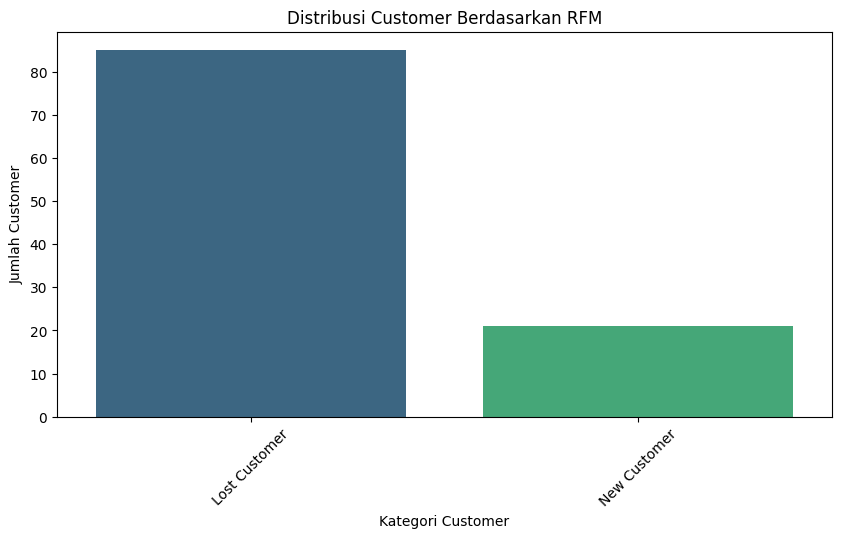

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df_rfm['Customer_Segment'], palette="viridis", order=df_rfm['Customer_Segment'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Customer Berdasarkan RFM")
plt.xlabel("Kategori Customer")
plt.ylabel("Jumlah Customer")
plt.show()

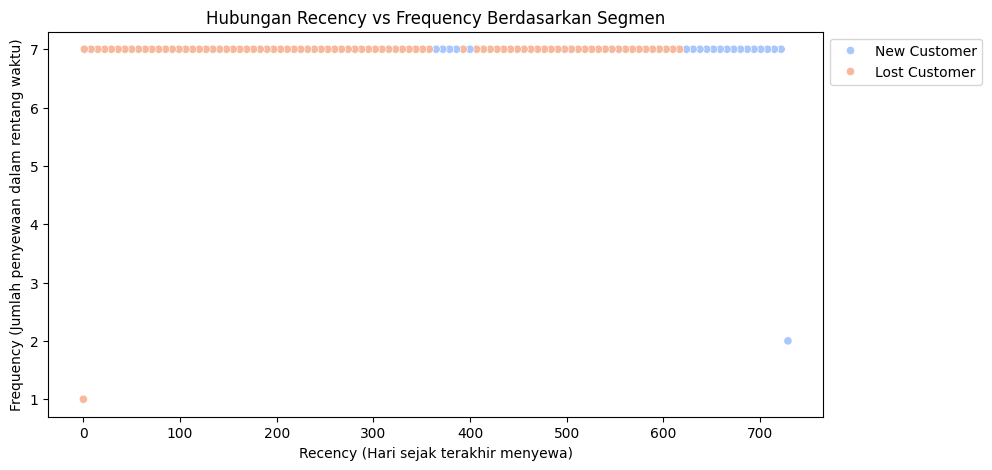

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_rfm, x='Recency', y='Frequency', hue='Customer_Segment', palette="coolwarm")
plt.title("Hubungan Recency vs Frequency Berdasarkan Segmen")
plt.xlabel("Recency (Hari sejak terakhir menyewa)")
plt.ylabel("Frequency (Jumlah penyewaan dalam rentang waktu)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Conclusion

**Berdasarkan analisis data penyewaan sepeda, berikut beberapa temuan utama yang diperoleh:**

- Pengaruh Hari Kerja dan Akhir Pekan terhadap Penyewaan
  - Tidak ada perbedaan yang signifikan antara jumlah penyewaan pada hari kerja dan akhir pekan. 
  - Namun, terdapat variabilitas jumlah penyewaan yang cukup tinggi di kedua kategori, menunjukkan bahwa faktor lain mungkin juga berpengaruh. 
- Pola Penyewaan Berdasarkan Hari dalam Seminggu
  - Penyewaan sepeda cukup stabil di seluruh hari dalam seminggu, dengan sedikit kenaikan pada hari-hari kerja. 
  - Hal ini menunjukkan bahwa penyewaan tidak hanya digunakan untuk keperluan commuting tetapi juga untuk aktivitas lain. 
- Pengaruh Suhu terhadap Penyewaan Sepeda
  - Terdapat korelasi positif antara suhu (temp) dengan jumlah penyewaan (cnt), yang berarti semakin tinggi suhu, semakin banyak      sepeda yang disewa. 
  - Hal ini mengindikasikan bahwa cuaca yang lebih hangat lebih mendorong orang untuk menggunakan sepeda.
- Pengaruh Kelembapan terhadap Penyewaan Sepeda
  - Tidak ada hubungan yang kuat antara kelembapan (hum) dan jumlah penyewaan sepeda.
  - Ini menunjukkan bahwa pengguna sepeda tidak terlalu terpengaruh oleh kelembapan dalam keputusannya untuk menyewa sepeda.
- Korelasi antar Variabel
  - Suhu memiliki korelasi yang cukup tinggi dengan jumlah penyewaan sepeda, sementara kecepatan angin dan kelembapan memiliki hubungan yang lebih lemah.
  - Hari kerja dan hari libur juga tidak memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda.
- RFM Analysis membantu mengidentifikasi pola perilaku pelanggan berdasarkan frekuensi penyewaan, waktu terakhir menyewa, dan nilai moneternya.
  - Mayoritas pelanggan masih dalam tahap new customer, sehingga perlu strategi retensi yang baik.
  - Loyal customer bisa menjadi target utama untuk program eksklusif guna mempertahankan mereka.
  - Pelanggan yang masuk kategori At Risk sebaiknya segera diberikan insentif agar tidak beralih ke layanan lain.

**Saran dan Implikasi:**
- Operator layanan penyewaan sepeda dapat mempertimbangkan strategi promosi berdasarkan cuaca, misalnya memberikan diskon di  hari-hari dengan suhu lebih dingin.
- Menawarkan insentif atau membership untuk Loyal Customer dan Potential Loyalist agar tetap menggunakan layanan.
- Memberikan diskon atau free trial bagi New Customer untuk meningkatkan retensi mereka.
- Mengirimkan email atau notifikasi untuk pelanggan At Risk agar mereka kembali menyewa sepeda.
- Melihat pola monetary score untuk menentukan paket harga yang lebih menarik bagi pengguna setia.


In [13]:
folder_path = "Data/"  

# Ambil semua file CSV dalam folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Gabungkan semua file CSV menjadi satu DataFrame
all_data = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)

# Simpan hasilnya ke file CSV baru
all_data.to_csv("Dashboard/all_data.csv", index=False)